# **SECTION 1: SUMMARY OF THE PROJECT**


Doing analysis on stock price prediction would help me to know the future rates based on the previous stock price available. This would give me an idea whether to buy or not that particular share. The interesting company  that came into my mind is AT&T as the prediction for that company is not that easy. 

The Machine Learning algorithm that I used is LSTM (Long Short Term Memory). With the help of LSTM, I was able to identify whether the stock price will increase or decrease. It predicts one day ahead value based on the recent 60 days. This is a different prediction scheme totally wherein we have to predict the entire validation data points without knowing any information in the validation data. 

The defined success criteria is that when I apply the following prediction scheme I would get a better idea of the analysis that I would be getting.

# **SECTION 2: SHOWING THE CODE AND ARCHITECTURE OF ML**

Firstly I have done plotting of Closing Price History which gave me an overview of the dataset available. Then the data is split into training data set and Test data set. A certain amount of data is fetched only for training purpose. For Testing purpose different data is fetched. More LSTM layers were added in order to improve the accuracy of the model. Later on, the model is compiled and trained. The model is compiled using Root Mean Squared Error (RMSE) for which the predictions were perfect. After that step, the model is trained and tested using testing data. For this purpose, complete new dataset is fetched. Preprocessing steps for test data is similar as the training data. The LSTM model is tested on the new dataset. I have added a plot of the predicted stock prices with original stock prices. The code for this explanation is included in Section 3.

# **SECTION 3: SHOWING THE OUTPUT OF THE MODEL USING DATASET**

**Part 1: Importing the libaries and Loading the Data set**

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')    #This is a specific style

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving keni_week10_data.xlsx to keni_week10_data.xlsx


In [ ]:
stock_data=pd.read_excel("keni_week10_data.xlsx", index_col=0)
stock_data.head()   #Just to check whether we loaded the correct dataset

,PX_HIGH,PX_LOW,PX_OPEN,PX_CLOSE,Adj Close,Volume
Date,,,,,,
2012-01-03,30.542,30.30,30.46,30.38,30.4482,33005280
2012-01-04,30.680,30.35,30.58,30.43,30.5102,37217380
2012-01-05,30.500,30.18,30.49,30.40,30.3361,34465639
2012-01-06,30.090,29.60,30.07,29.68,29.7412,45581958
2012-01-09,29.850,29.50,29.81,29.66,29.6097,26791849


In [ ]:
stock_data.shape  #Checking the size of the dataset

(2221, 6)

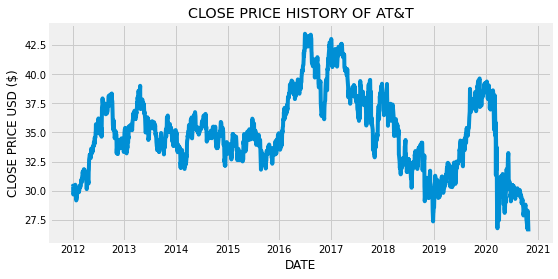

In [ ]:
plt.figure(figsize=(8,4))
plt.title('CLOSE PRICE HISTORY OF AT&T')
plt.plot(stock_data['PX_CLOSE'])
plt.xlabel('DATE',fontsize=12)
plt.ylabel('CLOSE PRICE USD ($)', fontsize=12)
plt.show()         #Visualizing the closing price history of AT&T

**Part 2: Splitting Data set in Training and Test Data sets**

In [ ]:
df=stock_data.filter(['PX_CLOSE'])  #Creating a new dataframe with only "Close" column
dataset=df.values                   #Converting dataframe to a numpy array
training_data_len=math.ceil(len(dataset)* .8)   #Getting the number of rows to train the model. Here we got 80% of data
training_data_len   #Print the number. The output should be 80% of total rows i.e. 2221

1777

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))  #It is necessary to Scale the dataset before giving it to NeuralNetwork Model
scaled_data=scaler.fit_transform(dataset) #Computes the min and max values 
scaled_data

array([[0.22863877],
       [0.23158515],
       [0.22981732],
       ...,
       [0.05185622],
       [0.02474956],
       [0.        ]])

In [ ]:
train_data=scaled_data[0:training_data_len , :]  #Create the scaled training data set

#Splitting the data into training data sets namely x_train and y_train
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])   #Contains first 60 values indexed from 0 to 59
    y_train.append(train_data[i, 0])
    
    if i<=61:
        print("X training dataset is", x_train)  #Prints the two pass through
        print("Y training dataset is", y_train)  #Prints the 61st value that we want our model to predict
        print()


X training dataset is [array([0.22863877, 0.23158515, 0.22981732, 0.18738951, 0.18621096,
       0.19210371, 0.20565704, 0.21331762, 0.21037124, 0.2209782 ,
       0.2256924 , 0.23099588, 0.23629935, 0.22981732, 0.21154979,
       0.2186211 , 0.17383618, 0.1567472 , 0.16735415, 0.17147908,
       0.18267531, 0.19387154, 0.20329994, 0.20447849, 0.20860342,
       0.20742487, 0.20565704, 0.19681791, 0.20860342, 0.21037124,
       0.19858574, 0.20742487, 0.20683559, 0.22628167, 0.22274602,
       0.23335298, 0.22628167, 0.22746022, 0.2374779 , 0.24101355,
       0.24337065, 0.25751326, 0.26458456, 0.24896877, 0.25810253,
       0.26517384, 0.27578079, 0.29110194, 0.30229817, 0.29169122,
       0.30288745, 0.29994107, 0.30347672, 0.31172658, 0.31467295,
       0.30701237, 0.29581615, 0.31172658, 0.30288745, 0.28638774])]
Y training dataset is [0.2775486152033002]

X training dataset is [array([0.22863877, 0.23158515, 0.22981732, 0.18738951, 0.18621096,
       0.19210371, 0.20565704, 0.2133

In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train) 

In [ ]:
#Reshape the data
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))  #3-dimensional shape for our dataset
x_train.shape

(1717, 60, 1)

**Part 3: Model Training and accuracy/ error/ loss**

In [ ]:
#Build The LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(x_train.shape[1], 1)))   #Adding 50 neurons. Since this is first layer, it should have input layer
model.add(LSTM(50, return_sequences=False))    #Adding 50 neurons. Here, we are not using LSTM layers for our model's architecture
model.add(Dense(25))                           #regular neural network model with 25 neurons
model.add(Dense(1))                      

In [ ]:
#Compile the model

#optimizer is used to improve upon loss function and loss function is used to determine the performance of model on training 
model.compile(optimizer='adam', loss='mean_squared_error')   

In [ ]:
#Train the model
model.fit(x_train,y_train, batch_size=1, epochs=1)

1717/1717 [==============================] - 37s 22ms/step - loss: 0.0037


In [ ]:
#Creating the testing data set

test_data=scaled_data[training_data_len - 60:, :]  #Create a new array containing scaled values from index 1717 to the end of our dataset  

#Create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:, :]   #y_test will have the values that our model wants to predict
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])   #x_test dataset contains the past 60 values

In [ ]:
#Convert the data to a numpy array so that we can use it in the LSTM model
x_test=np.array(x_test)

In [ ]:
#Reshape the data into 3-dimensional while our dataset is 2-dimensional. LSTM expects 3-dimensional shape.
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the models predicted price values
predictions=model.predict(x_test)   
predictions=scaler.inverse_transform(predictions)   #unscaling the values. we want predictions to contain same values as y_test dataset

In [ ]:
#Evaluating the model using root mean Squared error (RMSE)
rmse=np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.1275986580376153

The RMSE value means that the predictions were perfect.

**Part 4: Visualize the performance of the model**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


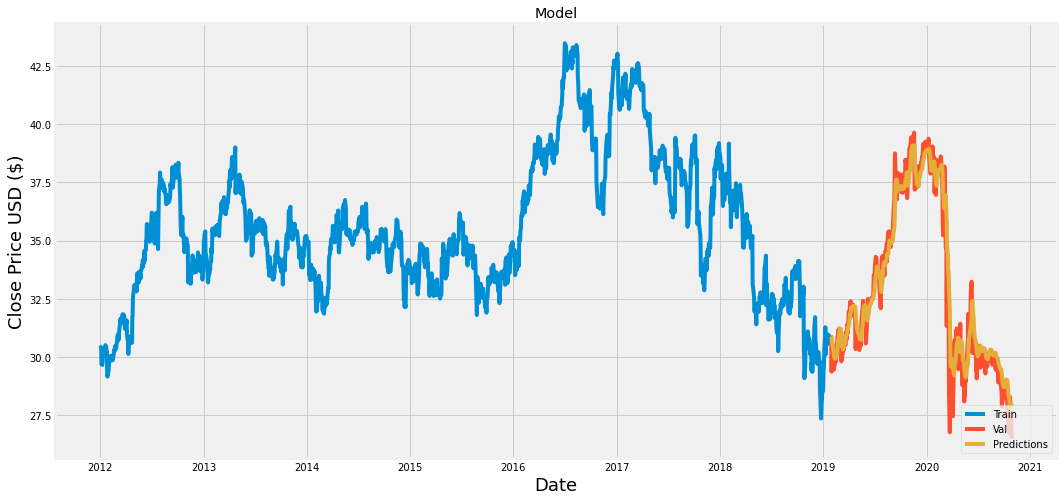

In [ ]:
train=df[: training_data_len]
valid=df[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['PX_CLOSE'])
plt.plot(valid[['PX_CLOSE','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

,PX_CLOSE,Predictions
Date,,
2019-01-28,30.67,30.884857
2019-01-29,30.70,30.877165
2019-01-30,29.37,30.876318
2019-01-31,30.06,30.675543
2019-02-01,30.00,30.532873
...,...,...
2020-10-22,28.28,27.710674
2020-10-23,27.82,27.791636
2020-10-26,27.38,27.907955


# **SECTION 4: SAVING THE ML MODEL FOR DISTRIBUTION**

In my Github, I have a private repository named 'Week 1'. I have uploaded my file 'keni_week11.ipynb' and dataset named 'keni_week10_data.xlsx' in the private repo. This is the dataset which I submitted in 10th Week and I did not want to make further changes to the data. So my Dataset remains the same. 

# **SECTION 5: INFERENCE TEST OF THE MODEL**

The LSTM Model is very popular in time series forcasting and this is the main reason why this model is chosen in this task. The task is to predict the stock prices for a few days, which is a time series problem. 

Testing the inference

In [ ]:
new_df=stock_data.filter(['PX_CLOSE'])  #Creating new dataframe with considering 'Close' column

last_60_days=new_df[-60:].values   #Get the last 60 days closing price values and convert the dataframe to an array

last_60_days_scaled=scaler.transform(last_60_days)  #Scale the data to be values between 0 and 1

X_test=[]    #Create an empty list
X_test.append(last_60_days_scaled)   #Append the last 60 days

X_test=np.array(X_test) #convert the X_test dataset to a numpy array

X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) #reshape the data
pred_price=model.predict(X_test)  #get the predicted scaled price

pred_price=scaler.inverse_transform(pred_price) #scaling
print(pred_price)

[[27.773428]]


In [ ]:
#Getting the actual value which is not in the dataset for verification
atnt=web.DataReader('T',data_source='yahoo', start='2020-10-29',end='2020-10-29')
print(atnt['Close'])

Date
2020-10-29    26.76
Name: Close, dtype: float64


This shows that the actual price on that day was 26.76 USD and the predicted value is 27.77 USD. The difference in both the values is only a dollar. This depicts that the prediction is very close to the actual value.

# **SECTION 6: SUMMARY**

The most difficult part of the execution of this project was applying LSTM model and visualize the prediction plot. I was stuck in this section for longer period of time but later through lot of research and watching Youtube videos I was able to figure out the solution. 
In this whole project, that was the most interesting part as it was very challenging for me but getting the final output at the end gave me satisfaction and confidence to move further.